In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.1f}'.format

In [372]:
nyc_crime = pd.read_csv('nyc_crime.csv')
nyc_crime[['Population']] = nyc_crime['Population'].str.replace(',','')
nyc_crime[['Violent Crime']] = nyc_crime['Violent Crime'].str.replace(',','')
nyc_crime[['Rape(Legal)']] = nyc_crime['Rape(Legal)'].str.replace(',','')
nyc_crime[['Property Crime']] = nyc_crime['Property Crime'].str.replace(',','')
nyc_crime[['Vehicle Theft']] = nyc_crime['Vehicle Theft'].str.replace(',','')
nyc_crime[['Larceny']] = nyc_crime['Larceny'].str.replace(',','')
nyc_crime[['Burglary']] = nyc_crime['Burglary'].str.replace(',','')
nyc_crime[['Robbery']] = nyc_crime['Robbery'].str.replace(',','')
nyc_crime[['Agg Assault']] = nyc_crime['Agg Assault'].str.replace(',','')
nyc_crime[
    ['Population', 'Violent Crime', 'Murder', 'Rape(Legal)', 'Robbery', 
     'Agg Assault', 'Property Crime', 'Burglary', 'Larceny', 'Vehicle Theft', 'Arson']
    ] = nyc_crime[
    ['Population', 'Violent Crime', 'Murder', 'Rape(Legal)', 'Robbery', 
     'Agg Assault', 'Property Crime', 'Burglary', 'Larceny', 'Vehicle Theft', 'Arson']
    ].astype(float)
nyc_crime['robbery_bool'] = np.where(nyc_crime['Robbery'] > 0, 1, 0)
nyc_crime['arson_bool'] = np.where(nyc_crime['Arson'] > 0, 1, 0)
nyc_crime['murder_bool'] = np.where(nyc_crime['Murder'] > 0, 1, 0)
nyc_crime['larceny_bool'] = np.where(nyc_crime['Larceny'] > 0, 1, 0)
nyc_crime['violent_bool'] = np.where(nyc_crime['Violent Crime'] > 0, 1, 0)
nyc_crime['burglary_bool'] = np.where(nyc_crime['Burglary'] > 0, 1, 0)
nyc_crime['larceny_rate'] = nyc_crime['Larceny'] / nyc_crime['Population']
nyc_crime['propertycrime_rate'] = nyc_crime['Property Crime'] / nyc_crime['Population']
nyc_crime['pop_squared'] = nyc_crime['Population'] * nyc_crime['Population']
# to_drop = ['New York']
# nyc_crime = nyc_crime[~nyc_crime['City'].isin(to_drop)]
nyc_crime = nyc_crime[nyc_crime['Population'] < 18160.5]
nyc_crime = nyc_crime.fillna(0)
nyc_crime.head(10)

,City,Population,Violent Crime,Murder,Rape (Rev),Rape(Legal),Robbery,Agg Assault,Property Crime,Burglary,...,Arson,robbery_bool,arson_bool,murder_bool,larceny_bool,violent_bool,burglary_bool,larceny_rate,propertycrime_rate,pop_squared
0,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,...,0.0,0,0,0,1,0,1,0.0,0.0,3463321.0
1,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,0.0,3.0,24.0,3.0,...,0.0,0,0,0,1,1,1,0.0,0.0,6640929.0
2,Akron Village,2846.0,3.0,0.0,0.0,0.0,0.0,3.0,16.0,1.0,...,0.0,0,0,0,1,1,1,0.0,0.0,8099716.0
4,Albion Village,6388.0,23.0,0.0,0.0,3.0,4.0,16.0,223.0,53.0,...,0.0,1,0,0,1,1,1,0.0,0.0,40806544.0
5,Alfred Village,4089.0,5.0,0.0,0.0,0.0,3.0,2.0,46.0,10.0,...,0.0,1,0,0,1,1,1,0.0,0.0,16719921.0
6,Allegany Village,1781.0,3.0,0.0,0.0,0.0,0.0,3.0,10.0,0.0,...,0.0,0,0,0,1,1,0,0.0,0.0,3171961.0
8,Amityville Village,9519.0,9.0,0.0,0.0,2.0,4.0,3.0,210.0,16.0,...,1.0,1,1,0,1,1,1,0.0,0.0,90611361.0
10,Arcade Village,2053.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,3.0,...,0.0,0,0,0,1,0,1,0.0,0.0,4214809.0
11,Ardsley Village,4523.0,5.0,0.0,0.0,0.0,3.0,2.0,33.0,4.0,...,0.0,1,0,0,1,1,1,0.0,0.0,20457529.0
12,Asharoken Village,658.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0,0,0,1,0,0,0.0,0.0,432964.0


In [402]:
regr = linear_model.LinearRegression()
# Mentor Q, why the reshape?
Y = nyc_crime['Property Crime'].values.reshape(-1, 1)
X = nyc_crime[['Population', 'pop_squared', 'Robbery', 'arson_bool', 
               'Murder', 'larceny_bool', 'Violent Crime',
               'Burglary']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 6.62311395e-03 -7.46749065e-08  1.97831319e+00  6.19644607e+00
  -1.83537089e+01  4.84838996e+00  2.16654125e+00  3.51127557e+00]]

Intercept: 
 [-8.79622057]

R-squared:
0.7908699567465122


In [403]:
predicted = regr.predict(X).ravel()
actual = nyc_crime['Property Crime']
residual = actual - predicted

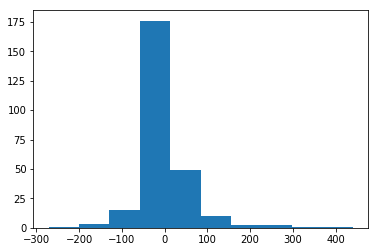

In [404]:
plt.hist(residual)
plt.show()

Text(0,0.5,'Residual')

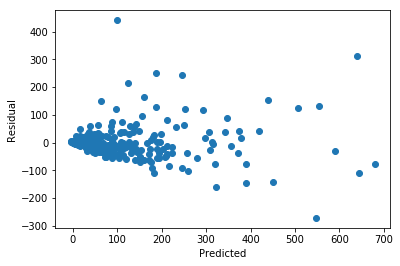

In [405]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')

In [371]:
nyc_crime.describe()

,Population,Violent Crime,Murder,Rape (Rev),Rape(Legal),Robbery,Agg Assault,Property Crime,Burglary,Larceny,Vehicle Theft,Arson,robbery_bool,arson_bool,murder_bool,larceny_bool,burglary_bool,larceny_rate,propertycrime_rate,pop_squared
count,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0
mean,6024.6,8.0,0.1,0.0,0.7,1.6,5.6,118.2,18.9,97.0,2.3,0.2,0.5,0.1,0.1,1.0,0.9,0.0,0.0,55722803.5
std,4416.1,12.2,0.2,0.0,1.6,3.0,8.6,139.9,23.0,118.3,3.7,0.7,0.5,0.3,0.2,0.2,0.3,0.0,0.0,73905127.2
min,526.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,276676.0
25%,2376.2,1.0,0.0,0.0,0.0,0.0,0.0,28.2,4.0,20.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5646631.8
50%,4664.5,3.0,0.0,0.0,0.0,0.0,3.0,65.5,11.0,52.5,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,21759120.5
75%,8542.5,9.0,0.0,0.0,1.0,2.0,7.0,155.2,23.0,121.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,72974307.0
max,18139.0,89.0,1.0,0.0,13.0,20.0,64.0,949.0,138.0,828.0,35.0,5.0,1.0,1.0,1.0,1.0,1.0,0.1,0.1,329023321.0
